# Notebook Imports


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB

plt.style.use("ggplot")

# Reading Data

In [23]:
df = pd.read_csv("../data/cleaned_data.csv", index_col=0)
df = df.drop(columns=["title"])
df.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ET
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,T


# Splitting Dataset


In [24]:
encoding = {"E": 0, "ET": 1, "T": 2, "M": 3}
df.esrb_rating = df.esrb_rating.replace(encoding)

In [25]:
train, val = train_test_split(df, test_size=0.2)

# Data Cleaning

Divided into x and y

In [26]:
train_x = train.drop(columns="esrb_rating")
train_y = train.esrb_rating

val_x = val.drop(columns="esrb_rating")
val_y = val.esrb_rating

<h1>Important features from Random Forest Classifier</h1>

In [27]:
max_depth = math.ceil(0.3 * len(train_x.columns))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


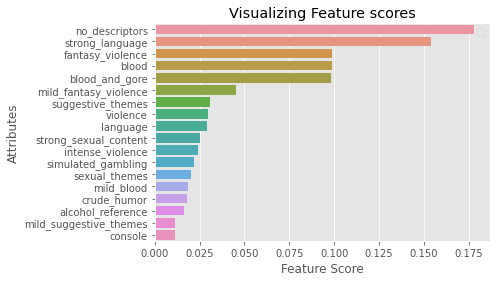

no_descriptors            0.177832
strong_language           0.154101
fantasy_violence          0.098973
blood                     0.098921
blood_and_gore            0.098035
mild_fantasy_violence     0.045496
suggestive_themes         0.030754
violence                  0.029915
language                  0.028837
strong_sexual_content     0.024952
intense_violence          0.024129
simulated_gambling        0.021888
sexual_themes             0.019898
mild_blood                0.018248
crude_humor               0.018149
alcohol_reference         0.016545
mild_suggestive_themes    0.011516
console                   0.011172
dtype: float64

In [28]:
model = RandomForestClassifier(
    n_estimators=300, max_depth=max_depth, random_state=1, criterion="gini"
).fit(train_x, train_y)
feature_imp = pd.Series(model.feature_importances_, index=train_x.columns).sort_values(
    ascending=False
)
feature_imp = feature_imp[feature_imp > 0.01]

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Score")
plt.ylabel("Attributes")
plt.title("Visualizing Feature scores")
plt.legend()
plt.show()

feature_imp


In [29]:
train = train.drop(columns=feature_imp.index)
val = val.drop(columns=feature_imp.index)
train.head()
train.columns

Index(['animated_blood', 'cartoon_violence', 'drug_reference', 'lyrics',
       'mature_humor', 'mild_cartoon_violence', 'mild_language', 'mild_lyrics',
       'mild_violence', 'nudity', 'partial_nudity', 'sexual_content',
       'use_of_alcohol', 'use_of_drugs_and_alcohol', 'esrb_rating'],
      dtype='object')

<AxesSubplot: >

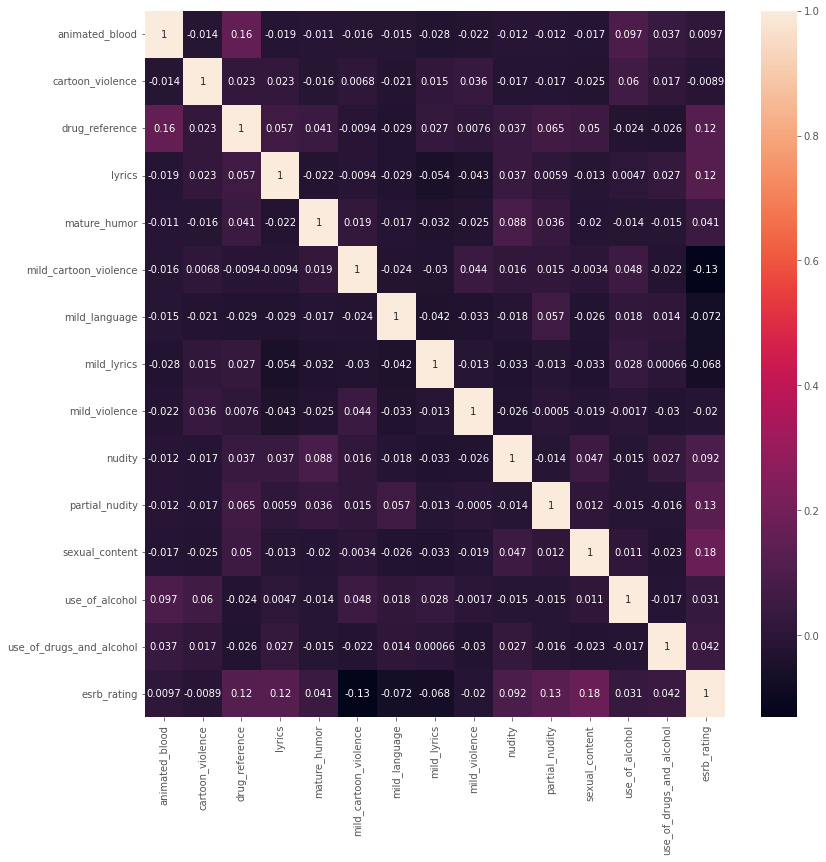

In [30]:
plt.figure(figsize=(13, 13))
sns.heatmap(train.corr(), annot=True)

In [31]:
train_x = train.drop(columns="esrb_rating")
train_y = train.esrb_rating

val_x = val.drop(columns="esrb_rating")
val_y = val.esrb_rating

In [46]:
mnb = MultinomialNB(alpha=0).fit(train_x, train_y)
y_pred = mnb.predict(val_x)
accuracy_score(val_y, y_pred)

/home/shayaan/.local/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


0.37566137566137564